In [29]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df=pd.read_csv('J:/Insurance cost prediction/insurance.csv')

In [31]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [34]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


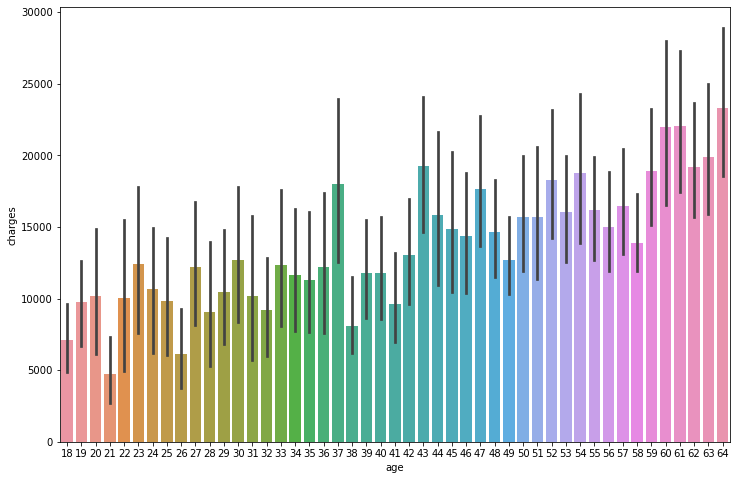

In [35]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'age', y = 'charges', data = df)
plt.show()

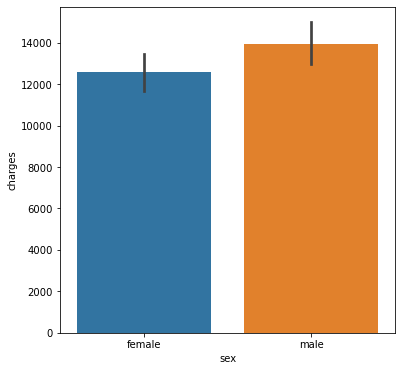

In [36]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'sex', y = 'charges', data = df)
plt.show()

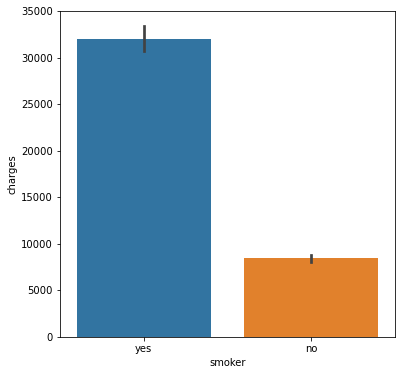

In [37]:
plt.figure(figsize = (6, 6))
sns.barplot(x = 'smoker', y = 'charges', data = df)
plt.show()

In [38]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
df['sex']= label_encoder.fit_transform(df['sex']) 
df['smoker']= label_encoder.fit_transform(df['smoker']) 
df['region']= label_encoder.fit_transform(df['region']) 

In [39]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


In [40]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [41]:
X=df.iloc[:,:-1]
X.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [42]:
y=df.iloc[:,-1]
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20)

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
model = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

In [47]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, n_estimators=40, n_jobs=-1)

In [48]:
y_pred = model.predict(X_test)

In [49]:
# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2*100)

MSE : 18632054.415310033
RMSE : 4316.48635064563
r2 score : 89.28147088925908


In [50]:
model.predict([[30,1,28,1,0,3]])

array([5536.66116253])

In [51]:
import pickle

In [53]:
pickle.dump(model,open('model.pkl','wb'))

In [54]:
model2 = pickle.load(open("model.pkl","rb"))

In [55]:
model2.predict([[30,1,28,1,0,3]])

array([5536.66116253])